# Correlation Matrix Analysis

This notebook reads a CSV file, selects specific fields, and computes a correlation matrix to visualize relationships between the selected fields.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Load the CSV Files

In [2]:
# Replace 'file1.csv' and 'file2.csv' with your actual file paths
file1_path = 'datasets/Student Engagement Level-Binary.csv'
file2_path = 'datasets/Student Performance Prediction-Multi.csv'

# Load the datasets
data1 = pd.read_csv(file1_path)
data2 = pd.read_csv(file2_path)

# Display the first few rows of both datasets
print("Dataset 1:")
display(data1.head())
print("\nDataset 2:")
display(data2.head())

Dataset 1:


,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement Level
0,student000000,143,344,58,0,3,0,0,0,178.166667,92.716667,116.166667,129.016667,H
1,student000001,70,342,0,0,4,0,0,0,294.033333,196.083333,217.750000,235.955556,L
2,student000002,42,219,0,0,3,0,0,0,169.600000,235.733333,260.333333,221.888889,L
3,student000003,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889,L
4,student000004,116,379,0,0,1,0,0,0,325.500000,236.283333,260.733333,274.172222,L



Dataset 2:


,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
0,student000000,95,91,70,90,84,64,85,85,G
1,student000001,85,76,65,61,73,64,76,76,G
2,student000002,85,41,73,61,73,61,73,73,G
3,student000003,80,78,80,79,79,57,80,79,G
4,student000004,85,91,78,80,84,67,85,85,G


## Step 2: Specify the Join Field

In [3]:
# Replace 'common_field' with the name of the column common to both datasets
join_field = 'Student ID'  # Specify the column used for joining

# Perform the join
merged_data = pd.merge(data1, data2, on=join_field, how='inner')  # Options for 'how': 'inner', 'outer', 'left', 'right'

# Display the merged dataset
print("\nMerged Dataset:")
display(merged_data.head())


Merged Dataset:


,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),...,Engagement Level,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
0,student000000,143,344,58,0,3,0,0,0,178.166667,...,H,95,91,70,90,84,64,85,85,G
1,student000001,70,342,0,0,4,0,0,0,294.033333,...,L,85,76,65,61,73,64,76,76,G
2,student000002,42,219,0,0,3,0,0,0,169.600000,...,L,85,41,73,61,73,61,73,73,G
3,student000003,92,271,2,0,6,0,0,0,341.150000,...,L,80,78,80,79,79,57,80,79,G
4,student000004,116,379,0,0,1,0,0,0,325.500000,...,L,85,91,78,80,84,67,85,85,G


## Step 3: Select Relevant Fields for Correlation

In [4]:
# Update with the names of the columns you want to include in the correlation matrix
selected_fields = ["# Logins", "# Content Reads", "# Forum Reads", "# Forum Posts", "# Quiz Reviews before submission",
                   "Assignment 1 lateness indicator", "Assignment 2 lateness indicator", "Assignment 3 lateness indicator",
                   "Assignment 1 duration to submit (in hours)", "Assignment 2 duration to submit (in hours)", "Assignment 3 duration to submit (in hours)", 
                   "Average time to submit assignment (in hours)", "Quiz01 [10]", "Midterm Exam [20]", "Assignment01 [8]", 
                   "Assignment02 [12]", "Assignment03 [25]", "Final Exam [35]", "Course Grade"]
subset_data = merged_data[selected_fields]

# Display the subset of data
print("\nSubset of Data for Correlation:")
display(subset_data.head())



Subset of Data for Correlation:


,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Quiz01 [10],Midterm Exam [20],Assignment01 [8],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade
0,143,344,58,0,3,0,0,0,178.166667,92.716667,116.166667,129.016667,95,70,91,90,84,64,85
1,70,342,0,0,4,0,0,0,294.033333,196.083333,217.750000,235.955556,85,65,76,61,73,64,76
2,42,219,0,0,3,0,0,0,169.600000,235.733333,260.333333,221.888889,85,73,41,61,73,61,73
3,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889,80,80,78,79,79,57,80
4,116,379,0,0,1,0,0,0,325.500000,236.283333,260.733333,274.172222,85,78,91,80,84,67,85


## Step 4: Compute the Correlation Matrix

In [5]:
# Compute the correlation matrix
correlation_matrix = subset_data.corr(numeric_only=True)

# Display the correlation matrix
print("\nCorrelation Matrix:")
display(correlation_matrix)


Correlation Matrix:


,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Quiz01 [10],Midterm Exam [20],Assignment01 [8],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade
# Logins,1.000000,0.402019,0.142017,0.114635,0.138327,-0.152603,-0.131389,-0.113152,-0.163729,-0.135471,-0.159775,-0.163176,0.105823,0.190737,0.213109,0.232890,0.229084,0.211520,0.279616
# Content Reads,0.402019,1.000000,0.149511,0.034688,0.173425,-0.162895,-0.172145,-0.153027,-0.062054,-0.023493,-0.086654,-0.063185,0.113303,0.087626,0.171625,0.156280,0.182418,0.166819,0.207318
# Forum Reads,0.142017,0.149511,1.000000,0.148867,0.148359,-0.037107,-0.035615,-0.027383,-0.090525,-0.092238,-0.074135,-0.090170,0.090842,-0.052989,0.075296,0.047944,0.031044,-0.001811,0.024019
# Forum Posts,0.114635,0.034688,0.148867,1.000000,0.099957,-0.016471,-0.016471,-0.000645,-0.100394,-0.101105,-0.072487,-0.095889,0.073001,0.110323,0.107280,0.082030,0.068073,0.096235,0.120866
# Quiz Reviews before submission,0.138327,0.173425,0.148359,0.099957,1.000000,-0.050975,0.003087,-0.037996,-0.018942,0.020372,-0.005935,-0.002806,0.144320,0.090690,0.131976,0.078842,0.068617,0.129582,0.142513
Assignment 1 lateness indicator,-0.152603,-0.162895,-0.037107,-0.016471,-0.050975,1.000000,0.401899,0.537194,0.546128,0.200800,0.339278,0.391490,-0.232621,-0.152034,-0.677927,-0.463957,-0.438917,-0.225832,-0.450707
Assignment 2 lateness indicator,-0.131389,-0.172145,-0.035615,-0.016471,0.003087,0.401899,1.000000,0.425909,0.231432,0.306224,0.320037,0.302663,-0.188971,-0.068991,-0.310429,-0.554019,-0.394969,-0.299577,-0.417722
Assignment 3 lateness indicator,-0.113152,-0.153027,-0.027383,-0.000645,-0.037996,0.537194,0.425909,1.000000,0.328919,0.179011,0.550220,0.386862,-0.145679,-0.074650,-0.396135,-0.452054,-0.589838,-0.224812,-0.429122
Assignment 1 duration to submit (in hours),-0.163729,-0.062054,-0.090525,-0.100394,-0.018942,0.546128,0.231432,0.328919,1.000000,0.859556,0.807165,0.941812,-0.220050,-0.265409,-0.339274,-0.298168,-0.251056,-0.301817,-0.385949
Assignment 2 duration to submit (in hours),-0.135471,-0.023493,-0.092238,-0.101105,0.020372,0.200800,0.306224,0.179011,0.859556,1.000000,0.844132,0.948825,-0.160270,-0.254270,-0.110876,-0.221515,-0.139862,-0.297564,-0.302014


## Step 5: Visualize the Correlation Matrix

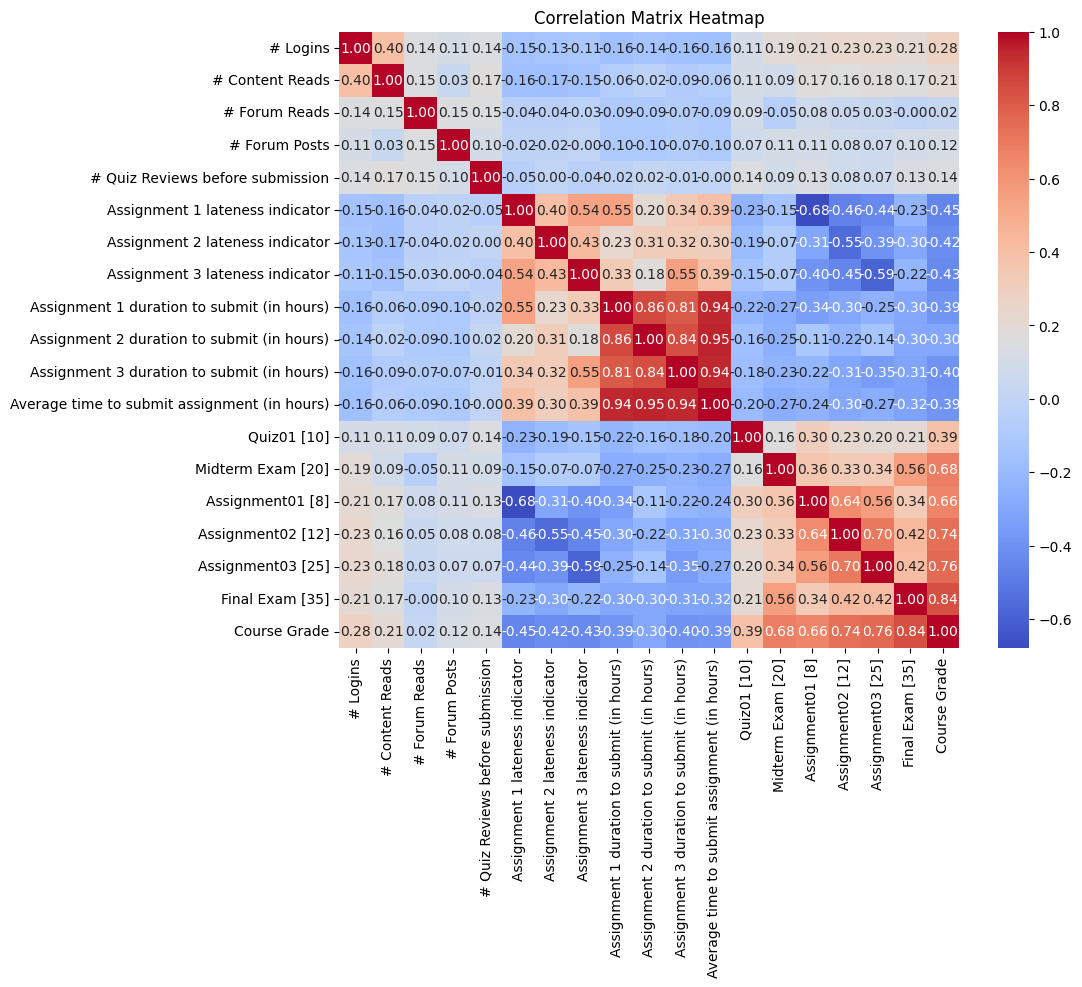

In [6]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()